# Question: How does budget affect revenue and profitability?

# Import all of the relevant data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [48]:
# Assigning the movie gross table to variable
tn_movie_budgets_clean = pd.read_csv("tn_movie_budgets_clean.csv")
#importing joined_gross_budget_cleaned.csv in case we want to use profit margin
tn_movie_budgets_clean.head()


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [49]:
# Assigning the joined_gross)budget to the variable
df = pd.read_csv("joined_gross_budget_cleaned.csv")
df.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
0,(500) Days of Summer,7.0,2009,7500000.0,32425665.0,34439060.0,26939060.0,78.22
1,10 Cloverfield Lane,3.0,2016,5000000.0,72082999.0,108286422.0,103286422.0,95.38
2,10 Things I Hate About You,3.0,1999,13000000.0,38177966.0,60413950.0,47413950.0,78.48
3,"10,000 B.C.",3.0,2008,105000000.0,94784201.0,269065678.0,164065678.0,60.98
4,12 Monkeys,12.0,1995,29000000.0,57141459.0,168841459.0,139841459.0,82.82


# Tidying up 

In [27]:
#checking the shape of the movie budgets
tn_movie_budgets_clean.shape

(5782, 6)

In [53]:
tn_movie_budgets_clean.isna().sum()

Unnamed: 0           0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [54]:
tn_movie_budgets_clean.describe()

,Unnamed: 0,production_budget,domestic_gross,worldwide_gross
count,5782.00000,5.782000e+03,5.782000e+03,5.782000e+03
mean,2890.50000,3.158776e+07,4.187333e+07,9.148746e+07
std,1669.26396,4.181208e+07,6.824060e+07,1.747200e+08
min,0.00000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1445.25000,5.000000e+06,1.429534e+06,4.125415e+06
50%,2890.50000,1.700000e+07,1.722594e+07,2.798445e+07
75%,4335.75000,4.000000e+07,5.234866e+07,9.764584e+07
max,5781.00000,4.250000e+08,9.366622e+08,2.776345e+09


In [50]:
#Using value_counts() to check for placeholder values and duplicates
tn_movie_budgets_clean["movie"].value_counts()

King Kong                           3
Home                                3
Halloween                           3
Life                                2
Pet Sematary                        2
                                   ..
Manchester by the Sea               1
The Queen                           1
Black Knight                        1
Eddie: The Sleepwalking Cannibal    1
Spirit: Stallion of the Cimarron    1
Name: movie, Length: 5698, dtype: int64

In [55]:
#Checking that duplicate titles are valid
tn_movie_budgets_clean[tn_movie_budgets_clean["movie"] == "Pet Sematary"]
tn_movie_budgets_clean[tn_movie_budgets_clean["movie"] == "King Kong"]

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
39,39,"Dec 14, 2005",King Kong,207000000,218080025,550517357
2374,2374,"Dec 17, 1976",King Kong,23000000,52614445,90614445
5396,5396,"Apr 7, 1933",King Kong,672000,10000000,10000650


In [56]:
#Checking out df
df.describe()

,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
count,3657.000000,3657.000000,3.657000e+03,3.657000e+03,3.657000e+03,3.657000e+03,3657.000000
mean,7.025431,2002.926989,3.844772e+07,6.258730e+07,1.389436e+08,1.004959e+08,62.261485
std,3.436380,13.809895,4.745361e+07,7.827059e+07,2.047894e+08,1.707332e+08,24.497175
min,1.000000,1915.000000,1.100000e+03,0.000000e+00,7.164400e+04,3.490000e+02,0.030000
25%,4.000000,1999.000000,7.000000e+06,1.443998e+07,2.548003e+07,1.113498e+07,46.050000
50%,7.000000,2006.000000,2.000000e+07,3.812200e+07,6.734822e+07,3.797725e+07,67.170000
75%,10.000000,2012.000000,5.000000e+07,7.936698e+07,1.646754e+08,1.128864e+08,81.680000
max,12.000000,2019.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,99.940000


In [58]:
#Using value_counts() to check for placeholder values and duplicates
df["title"].value_counts()
#Based on genereal knowldge duplicates are valied (re-releases)

Halloween                     3
King Kong                     3
The Last House on the Left    2
Death at a Funeral            2
Ghostbusters                  2
                             ..
The Ides of March             1
Enough Said                   1
Looper                        1
Vampires                      1
Eight Below                   1
Name: title, Length: 3611, dtype: int64

# Visualization

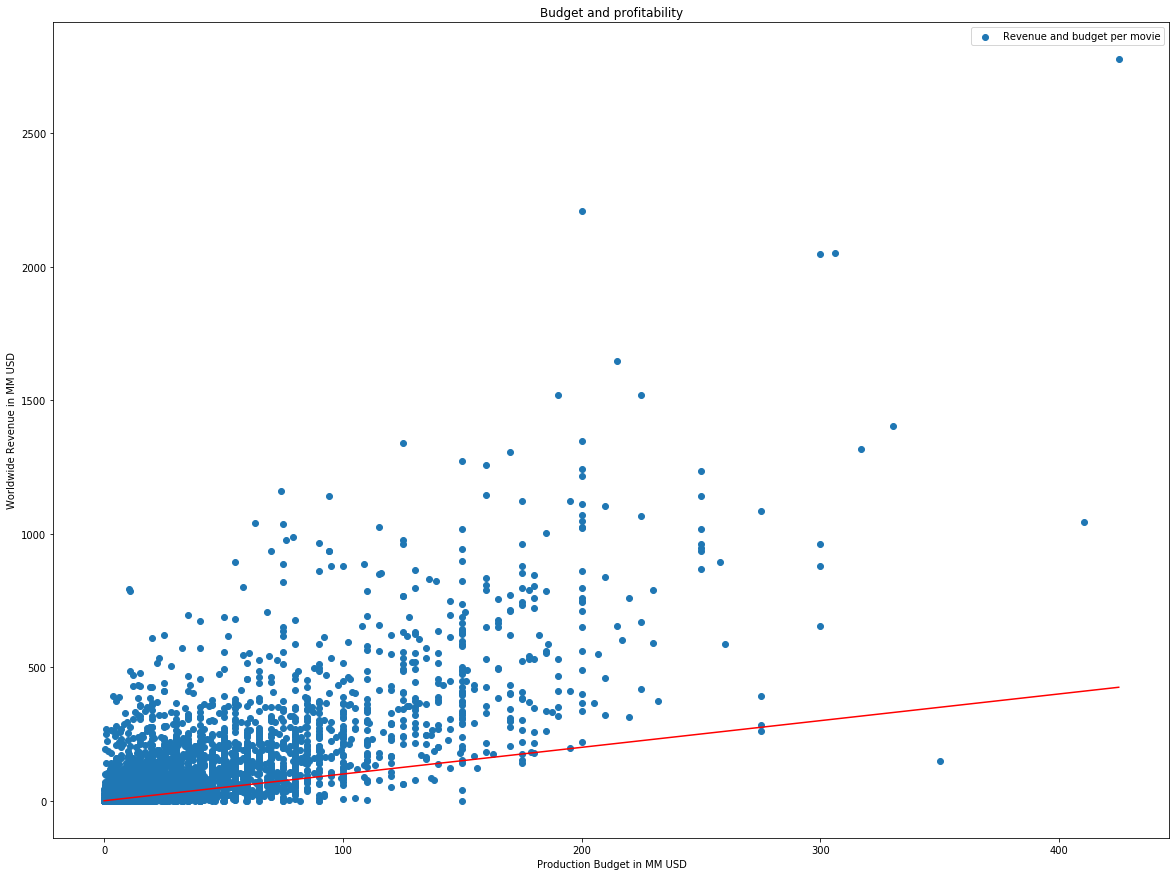

In [59]:
#Plotting budget and worldwide gross

#Dividing values by one million to make them easier to plot
data1 = tn_movie_budgets_clean["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = tn_movie_budgets_clean["worldwide_gross"].map(lambda x: round(x / 1000000, 2))

#Creating a figure
new_figure = plt.figure(figsize=(20,15))
# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)
#scatter of budget and worldwide gross
ax.scatter(data1, data2, label='Sample Data')
ax.legend(["Revenue and budget per movie"])

#line plot 
ax.plot(data1, data1, color="r")

# Add labels for x and y axes
plt.xlabel('Production Budget in MM USD')
plt.ylabel('Worldwide Revenue in MM USD')

#Add title
plt.title("Budget and profitability")

# Output the final plot
plt.show()

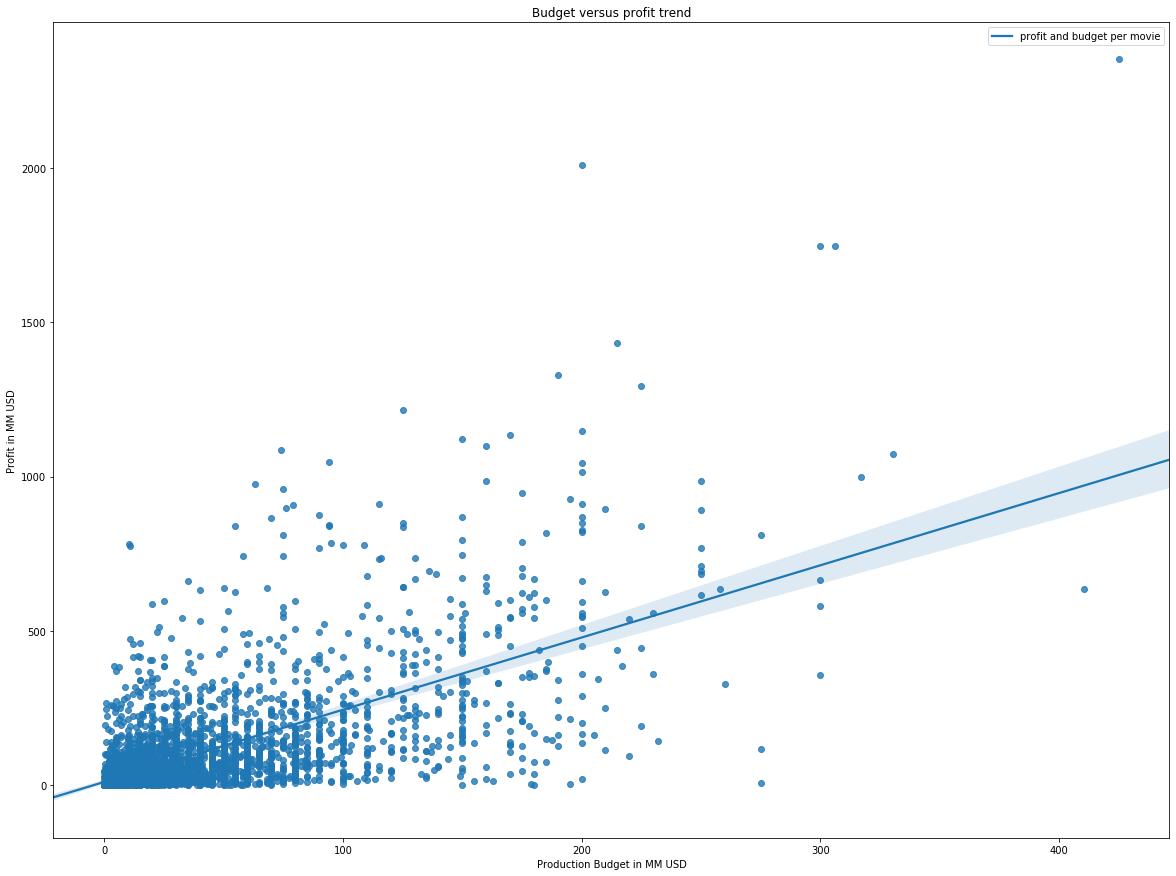

In [68]:
#Plotting budget and worldwide gross

#Dividing values by one million to make them easier to plot
data1 = df["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = df["net_prof"].map(lambda x: round(x / 1000000, 2))

#Creating a figure
new_figure = plt.figure(figsize=(20,15))

# Add a subplot to the figure - a new axes
ax = sns.regplot(x=data1, y=data2)

#scatter of budget and worldwide gross

ax.legend(["profit and budget per movie"])



# Add labels for x and y axes
plt.xlabel('Production Budget in MM USD')
plt.ylabel('Profit in MM USD')

#Add title
plt.title("Budget versus profit trend")

# Output the final plot
plt.show()

# Conclusion


As we can see from the first scatter more movies with lower budget are unprofitable. Movies in the middle of the range for budget values have the highest proportion of profitable movies. As we can see from the second figure there is a strong trend for profits to increase as the budget increases. Overall, the higher budget decreases the chances that the movie is unprofitable and leads to a higher profit, which makes sense given that higher budget movies go through a more rigourous vetting proccess.
